<a href="https://colab.research.google.com/github/Tegarsw17/california-house-pricing-colab/blob/main/potato_diseases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('content')

Mounted at content


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "content/MyDrive/data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch,label_batch in df.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 2 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1]


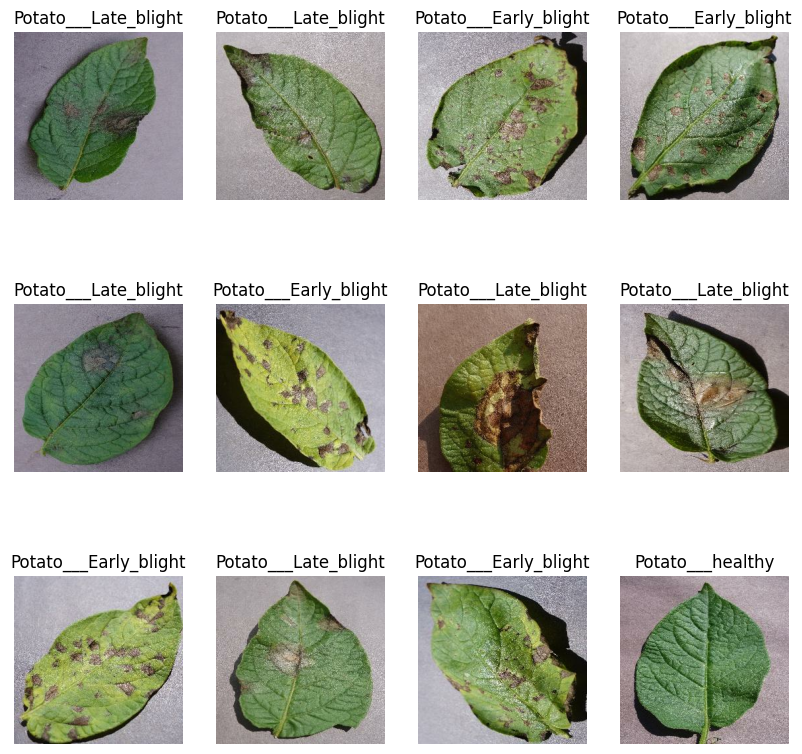

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in df.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)

  if shuffle: 
    ds=ds.shuffle(shuffle_size,seed=12)


  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)

  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partition(df)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_scaling=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_scaling,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 329s 3s/step - loss: 0.8698 - accuracy: 0.5388 - val_loss: 0.7526 - val_accuracy: 0.6510
Epoch 2/50
54/54 [==============================] - 164s 3s/step - loss: 0.5683 - accuracy: 0.7448 - val_loss: 0.5856 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 166s 3s/step - loss: 0.4094 - accuracy: 0.8252 - val_loss: 0.5822 - val_accuracy: 0.7760
Epoch 4/50
54/54 [==============================] - 173s 3s/step - loss: 0.3174 - accuracy: 0.8692 - val_loss: 0.1814 - val_accuracy: 0.9479
Epoch 5/50
54/54 [==============================] - 170s 3s/step - loss: 0.2887 - accuracy: 0.8877 - val_loss: 0.3099 - val_accuracy: 0.8854
Epoch 6/50
54/54 [==============================] - 173s 3s/step - loss: 0.2615 - accuracy: 0.8958 - val_loss: 0.1460 - val_accuracy: 0.9635
Epoch 7/50
54/54 [==============================] - 167s 3s/step - loss: 0.2311 - accuracy: 0.9068 - val_loss: 0.1075 - val_accuracy: 0.9479
Epoch 8/50
54

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 18s 1s/step - loss: 0.0218 - accuracy: 0.9883


In [ ]:
scores

[0.021594220772385597, 0.98828125]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.5387731194496155,
 0.7447916865348816,
 0.8252314925193787,
 0.8692129850387573,
 0.8877314925193787,
 0.8958333134651184,
 0.9068287014961243,
 0.9305555820465088,
 0.9409722089767456,
 0.9305555820465088,
 0.9311342835426331,
 0.9357638955116272,
 0.9490740895271301,
 0.9652777910232544,
 0.9537037014961243,
 0.9606481194496155,
 0.9699074029922485,
 0.9728009104728699,
 0.9803240895271301,
 0.9612268805503845,
 0.9820601940155029,
 0.9780092835426331,
 0.9722222089767456,
 0.9768518805503845,
 0.9814814925193787,
 0.984375,
 0.984375,
 0.9890046119689941,
 0.9849537014961243,
 0.9849537014961243,
 0.9826388955116272,
 0.9895833134651184,
 0.9785879850387573,
 0.9907407164573669,
 0.9947916865348816,
 0.9814814925193787,
 0.9918981194496155,
 0.9780092835426331,
 0.9756944179534912,
 0.9895833134651184,
 0.9826388955116272,
 0.9907407164573669,
 0.9884259104728699,
 0.9739583134651184,
 0.9866898059844971,
 0.9907407164573669,
 0.9907407164573669,
 0.9826388955116272,
 0.986111104

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

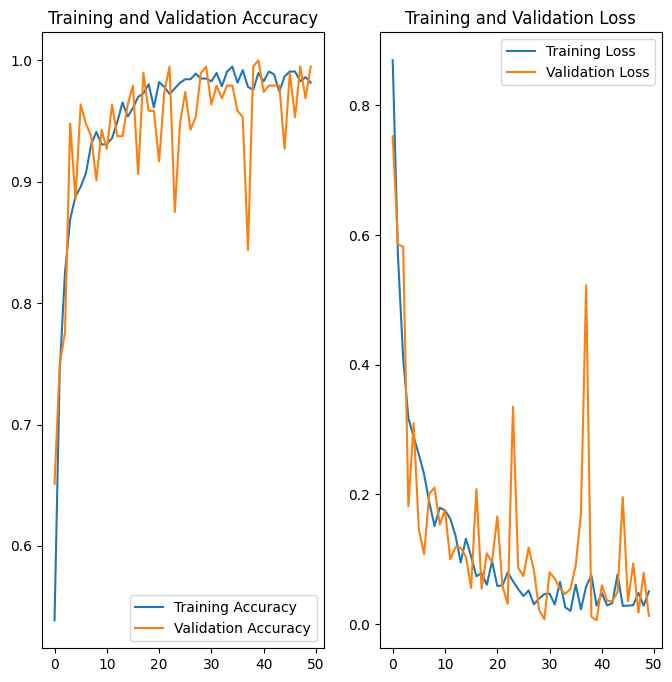

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted labe: Potato___Late_blight


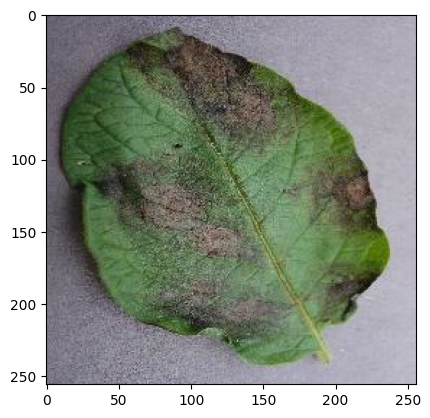

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print('First image to predict')
  plt.imshow(first_image)
  print("first image's actual label:",class_names[first_label])

  batch_prediction=model.predict(images_batch)
  # print(batch_prediction[0])
  # print(np.argmax(batch_prediction[0]))
  print('predicted labe:',class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  print(img_array)
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

<class 'numpy.ndarray'>
tf.Tensor(
[[[[117. 107. 118.]
   [112. 102. 113.]
   [110. 100. 111.]
   ...
   [142. 132. 143.]
   [143. 133. 144.]
   [144. 134. 145.]]

  [[115. 105. 116.]
   [110. 100. 111.]
   [109.  99. 110.]
   ...
   [144. 134. 145.]
   [144. 134. 145.]
   [144. 134. 145.]]

  [[117. 107. 118.]
   [114. 104. 115.]
   [113. 103. 114.]
   ...
   [146. 136. 147.]
   [144. 134. 145.]
   [143. 133. 144.]]

  ...

  [[126. 118. 131.]
   [130. 122. 135.]
   [132. 124. 137.]
   ...
   [154. 146. 157.]
   [153. 145. 156.]
   [153. 145. 156.]]

  [[125. 117. 130.]
   [128. 120. 133.]
   [129. 121. 134.]
   ...
   [155. 147. 158.]
   [155. 147. 158.]
   [154. 146. 157.]]

  [[130. 122. 135.]
   [133. 125. 138.]
   [132. 124. 137.]
   ...
   [155. 147. 158.]
   [156. 148. 159.]
   [156. 148. 159.]]]], shape=(1, 256, 256, 3), dtype=float32)
1/1 [==============================] - 0s 106ms/step
<class 'numpy.ndarray'>
tf.Tensor(
[[[[166. 163. 170.]
   [174. 171. 178.]
   [185. 182. 1

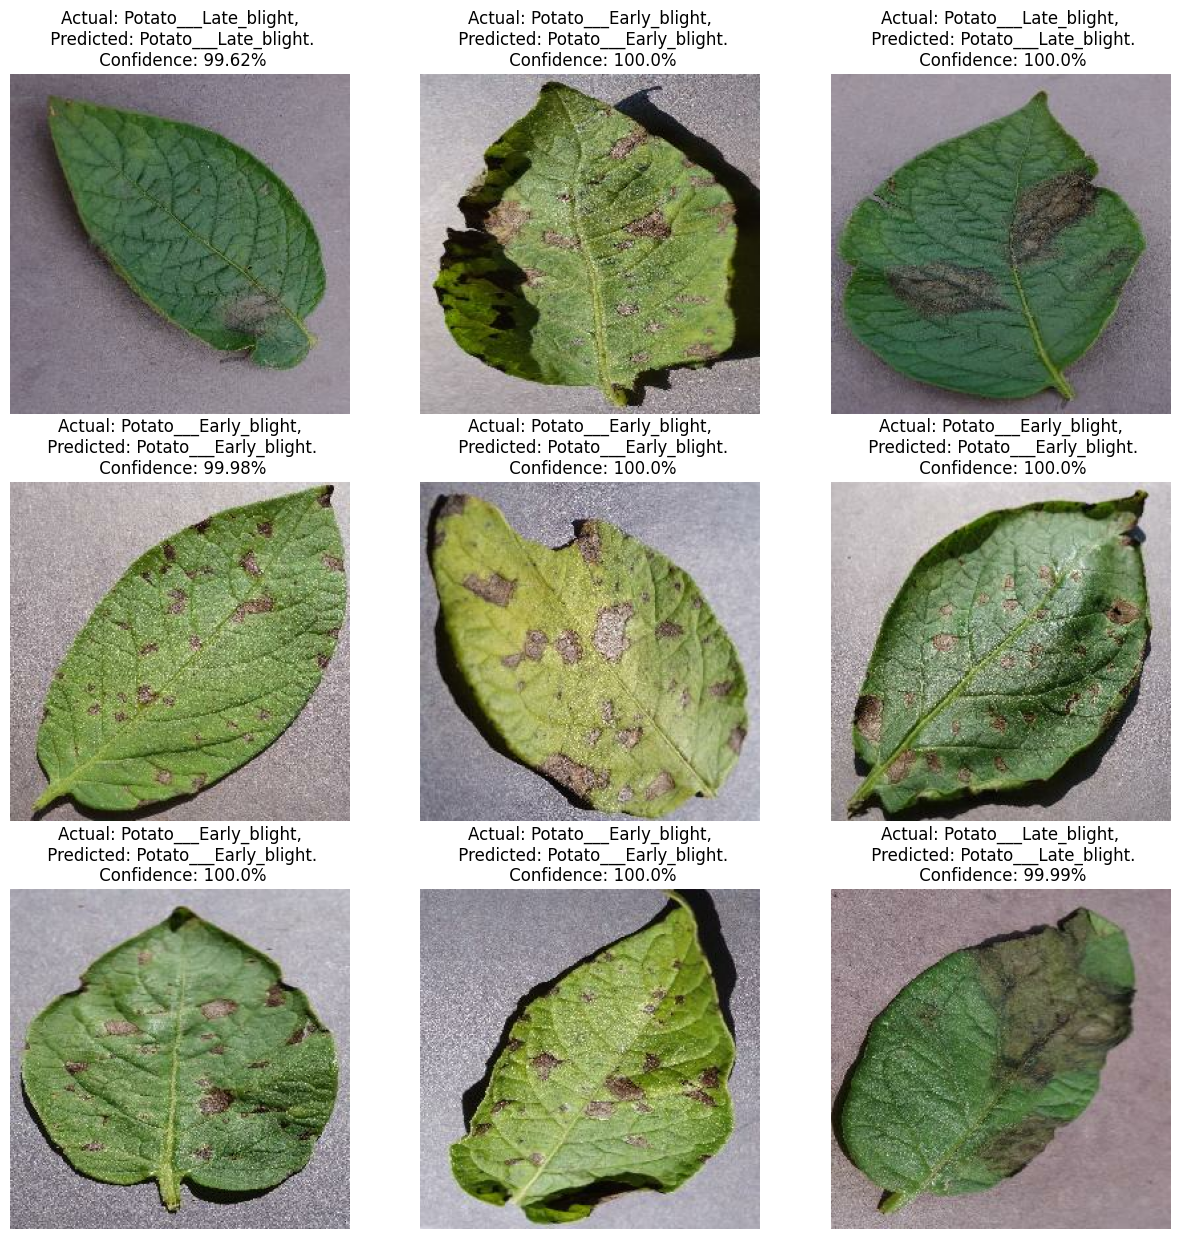

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis('off')

In [ ]:
import os
model_version=max([int(i)for i in os.listdir("./models")+[0]])+1

FileNotFoundError: ignored

In [ ]:
model_version=1
model.save("./models/model")
model.save("./models/model.h5")

In [ ]:
model.load()

In [ ]:
!zip -r ./models/model.zip ./models

	zip warning: name not matched: ./models

zip error: Nothing to do! (try: zip -r ./models/model.zip . -i ./models)


In [ ]:
!zip -r ./model.zip ./model

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 8%)
  adding: model/model.json (deflated 86%)


In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, tfjs_target_dir)

In [ ]:
!tensorflowjs_converter --input_format keras ./model.h5 model/

2023-05-16 08:58:32.173585: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 08:58:34.106432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from keras.models import load_model
model = load_model('content/MyDrive/data/model.h5')